# CO2 Group - Version 1 Quicklooks
OOI Data Labs Workshop - July 2019

Revised 11/12/19

**Working Title**: CO2 exchange between air and sea (Application phase)

This notebook will create quickplots for all PCO2A instruments.

In [1]:
# Notebook Setup
import requests
import os
import re
import xarray as xr
! pip install netcdf4==1.5.0
import matplotlib.pyplot as plt
import datetime 

# Setup default plot styles
import seaborn as sns
sns.set()

## 1. Request Data from OOINet

* **Time range:** 2016-01-01 00:00:00 to 2019-11-12 00:00:00
* **Variables:** PCO2 Air/Water, CO2 Flux, Wind Speed, Seawater Temperature, Salinity
* **Instruments** recovered_host pco2a_a_dcl_instrument_air_recovered
  * CE02SHSM-SBD12-04-PCO2AA000 Oregon Shelf Surface Mooring
  * CE04OSSM-SBD12-04-PCO2AA000 Oregon Offshore Surface Mooring	
  * CE07SHSM-SBD12-04-PCO2AA000 Washington Shelf Surface Mooring	
  * CE09OSSM-SBD12-04-PCO2AA000 Washington Offshore Surface Mooring	
  * CP01CNSM-SBD12-04-PCO2AA000 Pioneer Central Surface Mooring	
  * CP03ISSM-SBD12-04-PCO2AA000 Pioneer Inshore Surface Mooring	
  * CP04OSSM-SBD12-04-PCO2AA000 Pioneer Offshore Surface Mooring
  * GA01SUMO-SBD12-04-PCO2AA000 Global Argentine Apex Surface Mooring
  * GI01SUMO-SBD12-04-PCO2AA000 Global Irminger Apex Surface Mooring	
  * GS01SUMO-SBD12-04-PCO2AA000 Global Southern Apex Surface Mooring

In [0]:
instruments = ['CE02SHSM-SBD12-04-PCO2AA000',
'CE04OSSM-SBD12-04-PCO2AA000',
'CE07SHSM-SBD12-04-PCO2AA000',
'CE09OSSM-SBD12-04-PCO2AA000',
'CP01CNSM-SBD12-04-PCO2AA000',
'CP03ISSM-SBD12-04-PCO2AA000',
'CP04OSSM-SBD12-04-PCO2AA000',
'GA01SUMO-SBD12-04-PCO2AA000',
'GI01SUMO-SBD12-04-PCO2AA000',
'GS01SUMO-SBD12-04-PCO2AA000']

In [0]:
def request_data(reference_designator,method,stream,start_date=None,end_date=None):
  site = reference_designator[:8]
  node = reference_designator[9:14]
  instrument = reference_designator[15:]
  
  # Create the request URL
  api_base_url = 'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv'
  data_request_url ='/'.join((api_base_url,site,node,instrument,method,stream))

  # All of the following are optional, but you should specify a date range
  params = {
    'format':'application/netcdf',
    'include_provenance':'true',
    'include_annotations':'true'
  }
  if (start_date):
    params['beginDT'] = start_date
  if (end_date):
    params['endDT'] = end_date

  # Make the data request
  r = requests.get(data_request_url, params=params, auth=(API_USERNAME, API_TOKEN))
  data = r.json()
  
  # Return just the THREDDS URL
  return data['allURLs'][0] 

In [0]:
API_USERNAME = ''
API_TOKEN = ''

In [0]:
# for inst in instruments:
#   out = request_data(inst,'recovered_host','pco2a_a_dcl_instrument_air_recovered',
#              '2016-01-01T00:00:00.000Z','2019-11-12T00:00:00.000Z')
#   print(out)

## Data Files

In [0]:
urls={}
urls['CE02SHSM'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20191112T152907548Z-CE02SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/catalog.html'
urls['CE04OSSM'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20191112T152908554Z-CE04OSSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/catalog.html'
urls['CE07SHSM'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20191112T152909598Z-CE07SHSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/catalog.html'
urls['CE09OSSM'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20191112T152910710Z-CE09OSSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/catalog.html'
urls['CP01CNSM'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20191112T152911822Z-CP01CNSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/catalog.html'
urls['CP03ISSM'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20191112T152912953Z-CP03ISSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/catalog.html'
urls['CP04OSSM'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20191112T152913997Z-CP04OSSM-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/catalog.html'
urls['GA01SUMO'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20191112T152915020Z-GA01SUMO-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/catalog.html'
urls['GI01SUMO'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20191112T152915828Z-GI01SUMO-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/catalog.html'
urls['GS01SUMO'] = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage@marine.rutgers.edu/20191112T152916755Z-GS01SUMO-SBD12-04-PCO2AA000-recovered_host-pco2a_a_dcl_instrument_air_recovered/catalog.html'

# for key,value in urls.items():
#   print(k[0:8])

## Helpful Functions

In [0]:
def get_data(url,bad_inst=''):
  '''Function to grab all data from specified directory'''
  tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
  datasets = requests.get(url).text
  urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
  x = re.findall(r'(ooi/.*?.nc)', datasets)
  for i in x:
    if i.endswith('.nc') == False:
      x.remove(i)
  for i in x:
    try:
      float(i[-4])
    except:
      x.remove(i)
  datasets = [os.path.join(tds_url, i) for i in x]
  
  # Remove extraneous data files if necessary
  catalog_rms = url.split('/')[-2][20:]
  selected_datasets = []
  for d in datasets:
    if catalog_rms == d.split('/')[-1].split('_20')[0][15:]:
      selected_datasets.append(d)
  selected_datasets = sorted(selected_datasets)
  # print(selected_datasets)

  # Hack  to remove bad files
  if 'CE07SHSM' in url:
    selected_datasets = list( selected_datasets[i] for i in [0,1,2,6,7,8,10,11] ) 
  if 'CP04OSSM' in url:
    selected_datasets.pop(19)
  
  # Load in dataset
  ds = xr.open_mfdataset(selected_datasets)
  ds = ds.swap_dims({'obs': 'time'}) # Swap the primary dimension
  ds = ds.chunk({'time': 1000}) # Used for optimization
  ds = ds.sortby('time') # Data from different deployments can overlap so we want to sort all data by time stamp.
  return ds

In [0]:
import numpy as np
def reject_outliers(data, m=5):
    """
    Reject outliers beyond m standard deviations of the mean.
    :param data: numpy array containing data
    :param m: number of standard deviations from the mean. Default: 3
    """
    stdev = np.nanstd(data)
    if stdev > 0.0:
        ind = abs(data - np.nanmean(data)) < m * stdev
    else:
        ind = len(data) * [True]

    return ind

In [0]:
def plot_data(d,name='fig'):
  fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,sharex=True,figsize=(12,10))
  avgint='4D'
  timeshift = 2

  data = d.to_dataframe()
  # FIGURE 1 = CO2 in ATMOSPHERE AND OCEANS
  data.partial_pressure_co2_atm.plot(ax=ax1,label='Atmosphere',linestyle='None',marker='.',markersize=1,color='w')
  data.partial_pressure_co2_ssw.plot(ax=ax1,label='Seawater',linestyle='None',marker='.',markersize=1,color='w')
  data.partial_pressure_co2_atm.resample(avgint).mean().tshift(timeshift,freq='D').plot(ax=ax1,label='Atmosphere Avg')
  data.partial_pressure_co2_ssw.resample(avgint).mean().tshift(timeshift,freq='D').plot(ax=ax1,label='Seawater Avg')
  # ax1.set_ylim([180,580]);
  # ax1.set_ylabel('Air and Water CO2 (uatm)')
  ax1.set_ylabel('{} ({})'.format('pCO2', d.partial_pressure_co2_atm.units),fontsize=8)
  ax1.legend();

  # # FIGURE 2 = CO2 FLUX
  data.pco2_co2flux.plot(ax=ax2,linestyle='None',marker='.',markersize=0.5,color='w',label='Raw')
  data.pco2_co2flux.resample(avgint).mean().tshift(timeshift,freq='D').plot(ax=ax2,color='c',label='Avg')
  # ax2.set_ylim([-20,10])
  # ax2.set_ylabel('CO2 flux (mmol m^-2 d^-1)')
  ax2.set_ylabel('{} ({})'.format('CO2 Flux from Ocean', d.pco2_co2flux.units),fontsize=8)
  ax2.legend();

  # FIGURE 3 = WIND SPEED
  data.met_wind10m.plot(ax=ax3,linestyle='None',marker='.',markersize=0.5,color='w',label='Raw')
  data.met_wind10m.resample(avgint).mean().tshift(timeshift,freq='D').plot(ax=ax3,color='b',label='Avg')
  ax3.set_ylim([2,10])
  # ax3.set_ylabel('Wind Speed (m/s)')
  ax3.set_ylabel('{} ({})'.format('Wind Velocity at 10 M', 'm/s'),fontsize=8)
  ax3.legend();

  # FIGURE 4 = SEA SURFACE TEMP
  data.sea_surface_temperature.plot(ax=ax4,linestyle='None',marker='.',markersize=0.5,color='w',label='Raw')
  data.sea_surface_temperature.resample(avgint).mean().tshift(timeshift,freq='D').plot(ax=ax4,color='r',label='Avg')
  # ax4.set_ylim([1.5,12])
  # ax4.set_ylabel('Sea Surface Temp (C)')
  ax4.set_ylabel('{} ({})'.format('Temperature', d.sea_surface_temperature.units),fontsize=8)
  ax4.legend();

  # FIGURE 5 = Salinity
  data.met_salsurf.plot(ax=ax5,linestyle='None',marker='.',markersize=0.5,color='w',label='Raw')
  data.met_salsurf.resample(avgint).mean().tshift(timeshift,freq='D').plot(ax=ax5,color='g',label='Avg')
  # ax5.set_ylim([1.5,12])
  # ax5.set_ylabel('Sea Surface Temp (C)')
  ax5.set_ylabel('{} ({})'.format('Salinity', d.met_salsurf.units),fontsize=8)
  ax5.legend();

  ax1.set_title(name);
  plt.savefig(name+'.png')

## Load and Plot each Instrument

In [0]:
# # Test Case
# instrument = 'CE02SHSM'
# url = urls[instrument]

CE02SHSM


/usr/local/lib/python3.6/dist-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/usr/local/lib/python3.6/dist-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


CE04OSSM


/usr/local/lib/python3.6/dist-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/usr/local/lib/python3.6/dist-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


CE07SHSM


/usr/local/lib/python3.6/dist-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)
/usr/local/lib/python3.6/dist-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


CE09OSSM


/usr/local/lib/python3.6/dist-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/usr/local/lib/python3.6/dist-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


CP01CNSM


/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)
/usr/local/lib/python3.6/dist-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


CP03ISSM


/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)
/usr/local/lib/python3.6/dist-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


CP04OSSM


/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)
/usr/local/lib/python3.6/dist-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


GA01SUMO


/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


GI01SUMO


/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/usr/local/lib/python3.6/dist-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater
  return func(*args2)


GS01SUMO


/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


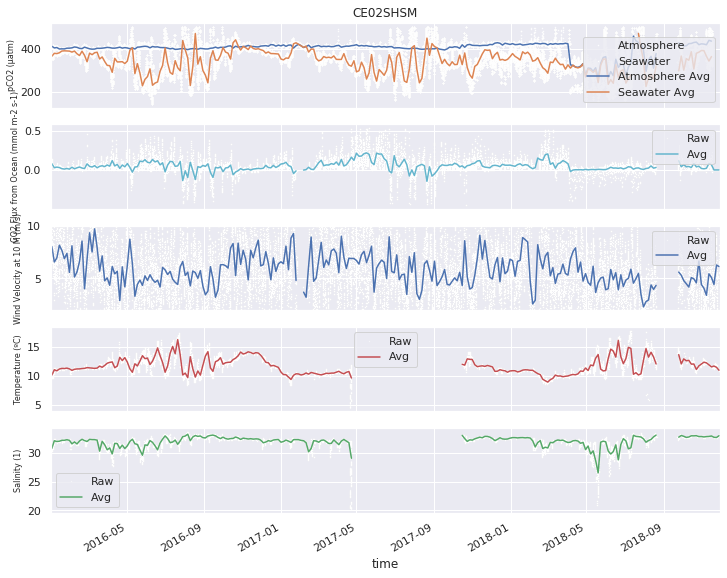

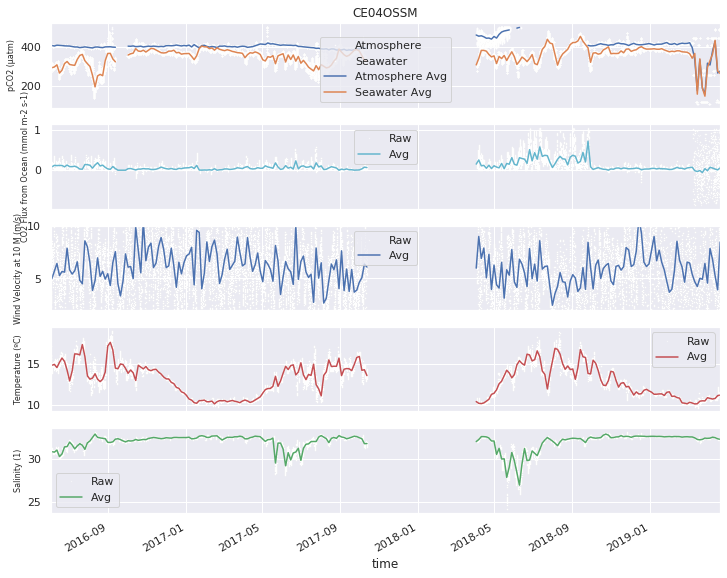

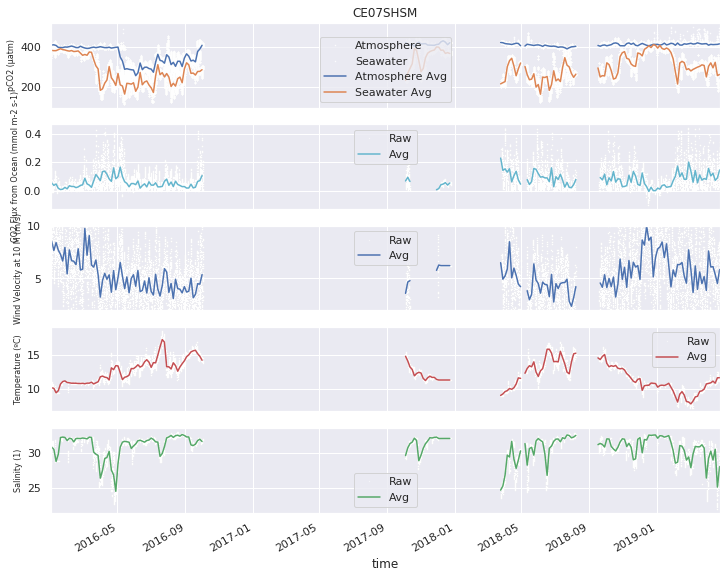

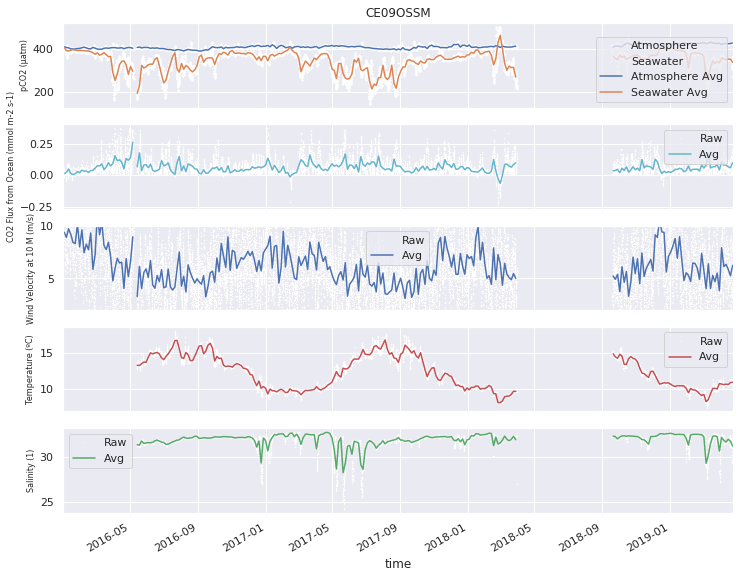

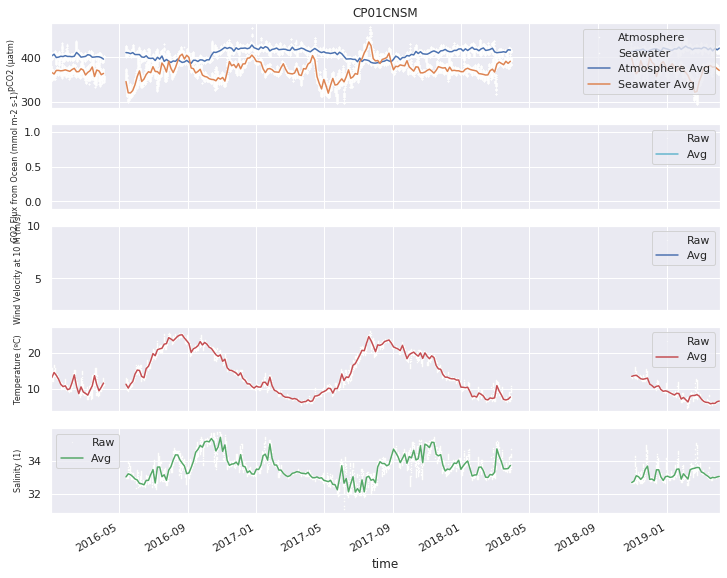

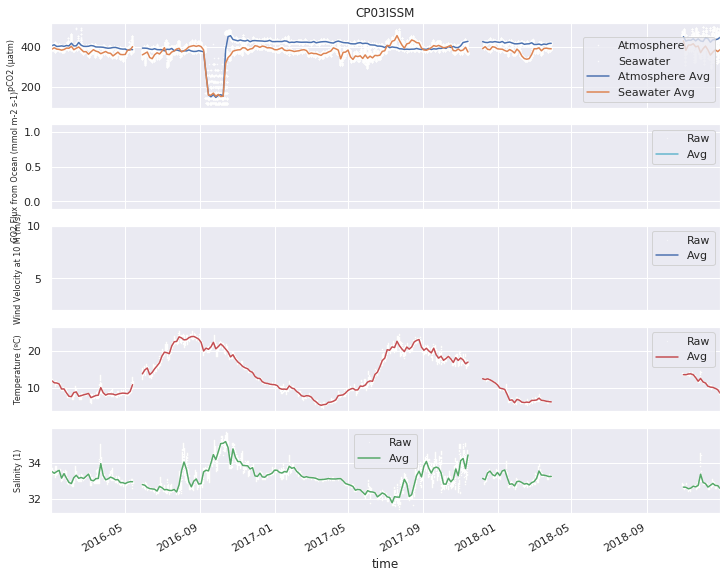

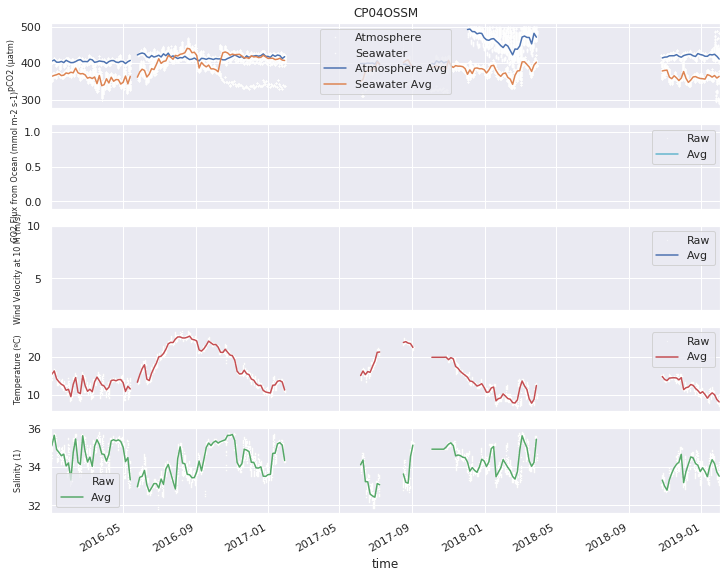

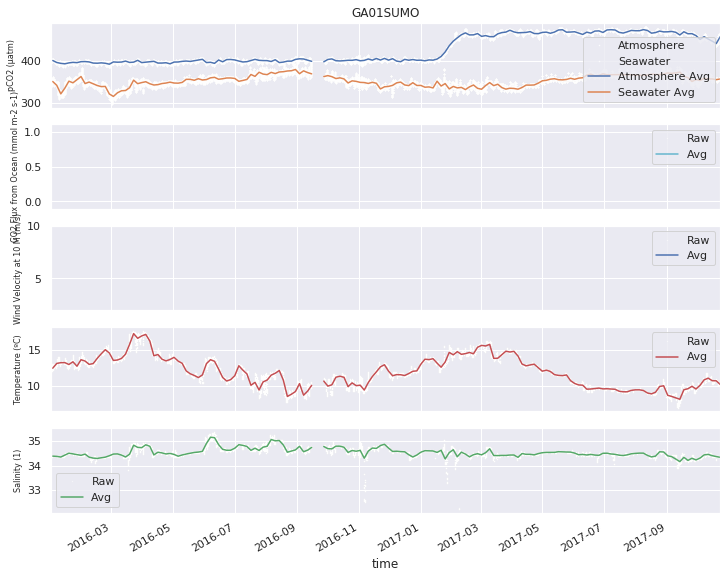

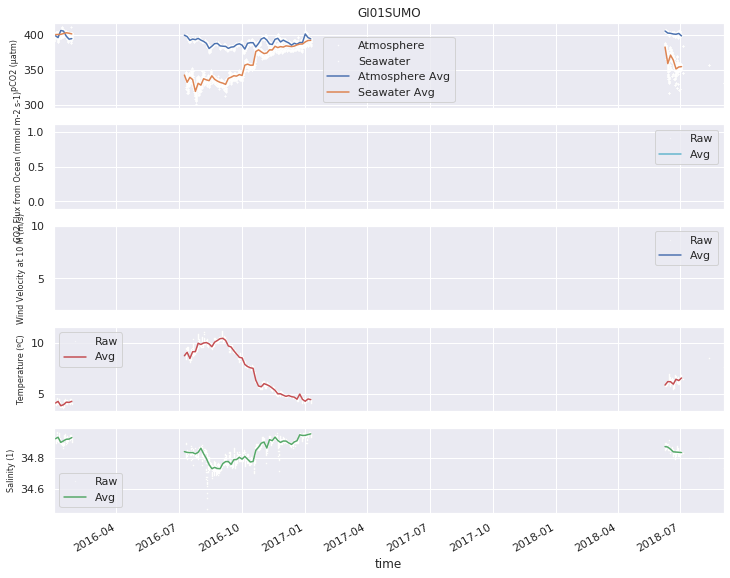

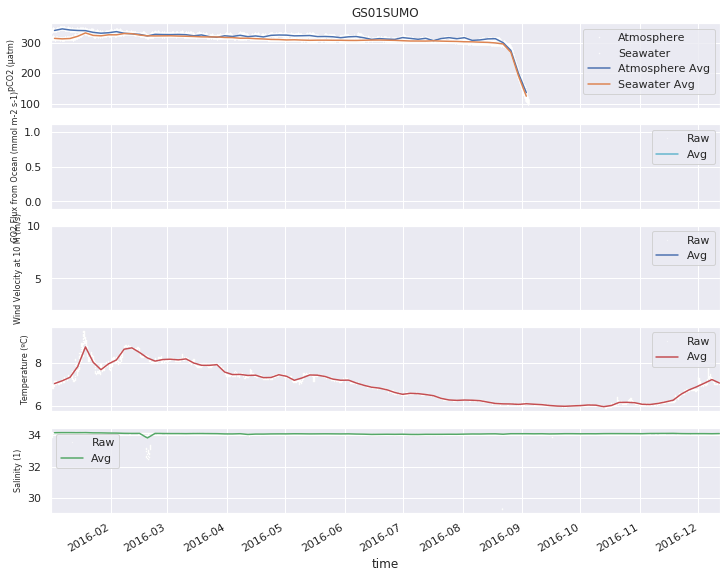

In [11]:
for instrument,url in urls.items():
  print(instrument)
  # Load the Data
  data = get_data(url)
  # Change Flux Units
  data['pco2_co2flux'] = data['pco2_co2flux'] *1e6
  data['pco2_co2flux'].attrs['units'] = 'mmol m-2 s-1'
  # Some cleaning
  data['partial_pressure_co2_atm'] = data['partial_pressure_co2_atm'].where(reject_outliers(data['partial_pressure_co2_atm']))
  data['partial_pressure_co2_ssw'] = data['partial_pressure_co2_ssw'].where(reject_outliers(data['partial_pressure_co2_ssw']))
  data['pco2_co2flux'] = data['pco2_co2flux'].where(reject_outliers(data['pco2_co2flux']))
  data['partial_pressure_co2_atm'] = data['partial_pressure_co2_atm'].where((data['partial_pressure_co2_atm']>100) & (data['partial_pressure_co2_atm']<500))
  data['partial_pressure_co2_ssw'] = data['partial_pressure_co2_ssw'].where((data['partial_pressure_co2_ssw']>100) & (data['partial_pressure_co2_ssw']<500))
  data['sea_surface_temperature'] = data['sea_surface_temperature'].where(data['sea_surface_temperature']>0)
  data['met_salsurf'] = data['met_salsurf'].where(data['met_salsurf']>20)
  plot_data(data,instrument[0:8])